In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib notebook

In [63]:
import numpy as np
import pyroomacoustics as pra
import matplotlib.pyplot as plt
import librosa
from mpl_toolkits.mplot3d import Axes3D

In [4]:
import src.utils.acu_utils as acu
import src.utils.geo_utils as geo

In [50]:
mic_center = np.array([[2.5], [2.6], [1.5]])
mic_array = acu.get_oculus_array(mic_center=mic_center)

In [51]:
R = mic_array.mic_pos
print(R)

[[-0.016 -0.016  0.    -0.016 -0.016]
 [-0.055  0.055  0.    -0.021  0.039]
 [ 0.     0.     0.    -0.085 -0.085]]


<IPython.core.display.Javascript object>


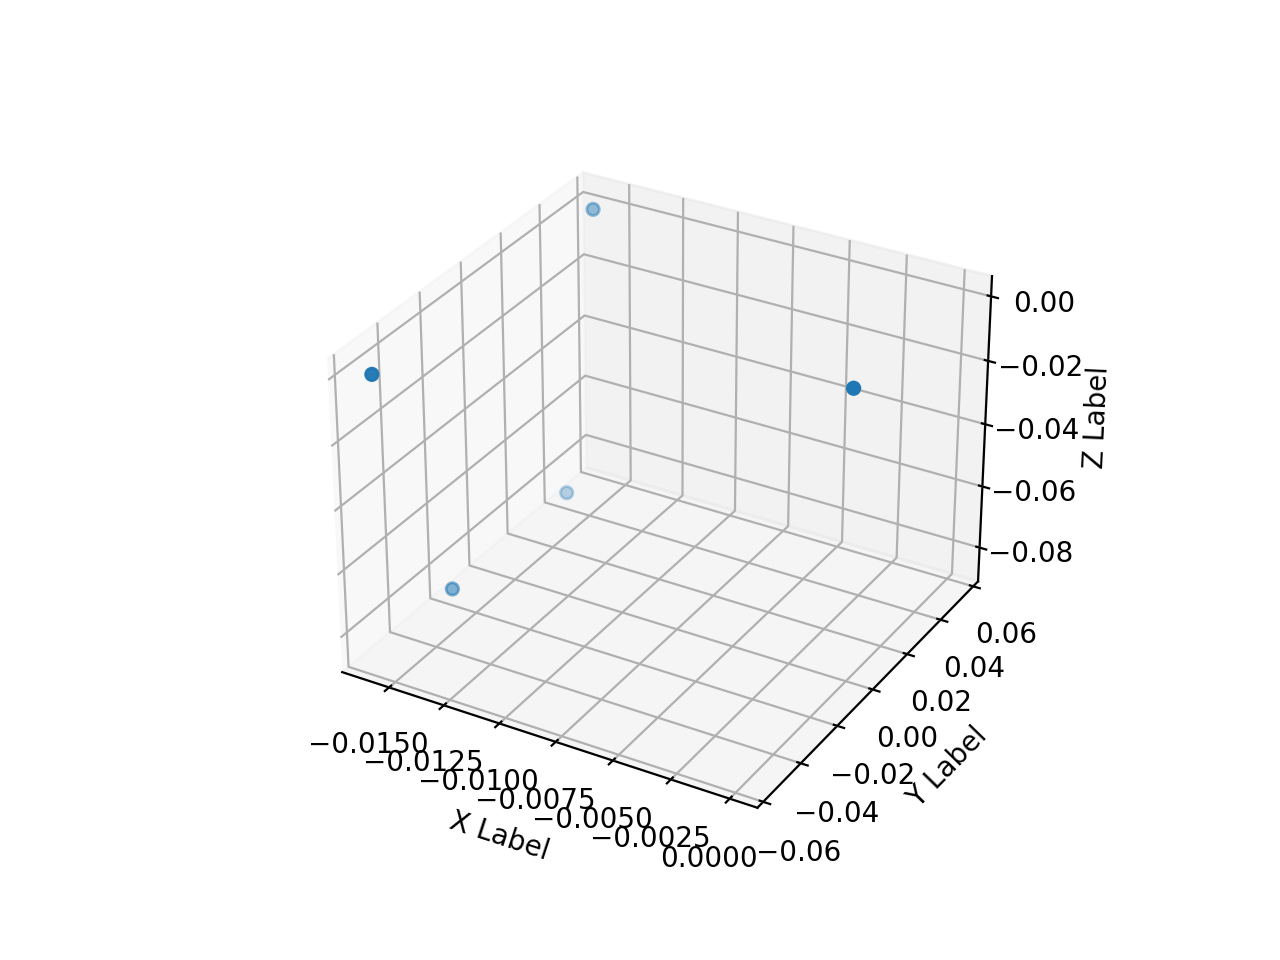

In [52]:
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter(R[0,:],R[1,:],R[2,:])
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.show()

In [54]:
# add source in az=0, el=0, dist=1

az = 30
el = -5
r = 1.5

DOA = geo.DOASetup(np.array([r,az,el]), r,az,el,True)

razel = np.array([[DOA.distance],[DOA.azimuth],[DOA.elevation]])

src_loc = geo.sph2cart(razel, DOA.deg)
S = src_loc + mic_array.center
R = mic_array.mic_pos + mic_array.center

<IPython.core.display.Javascript object>


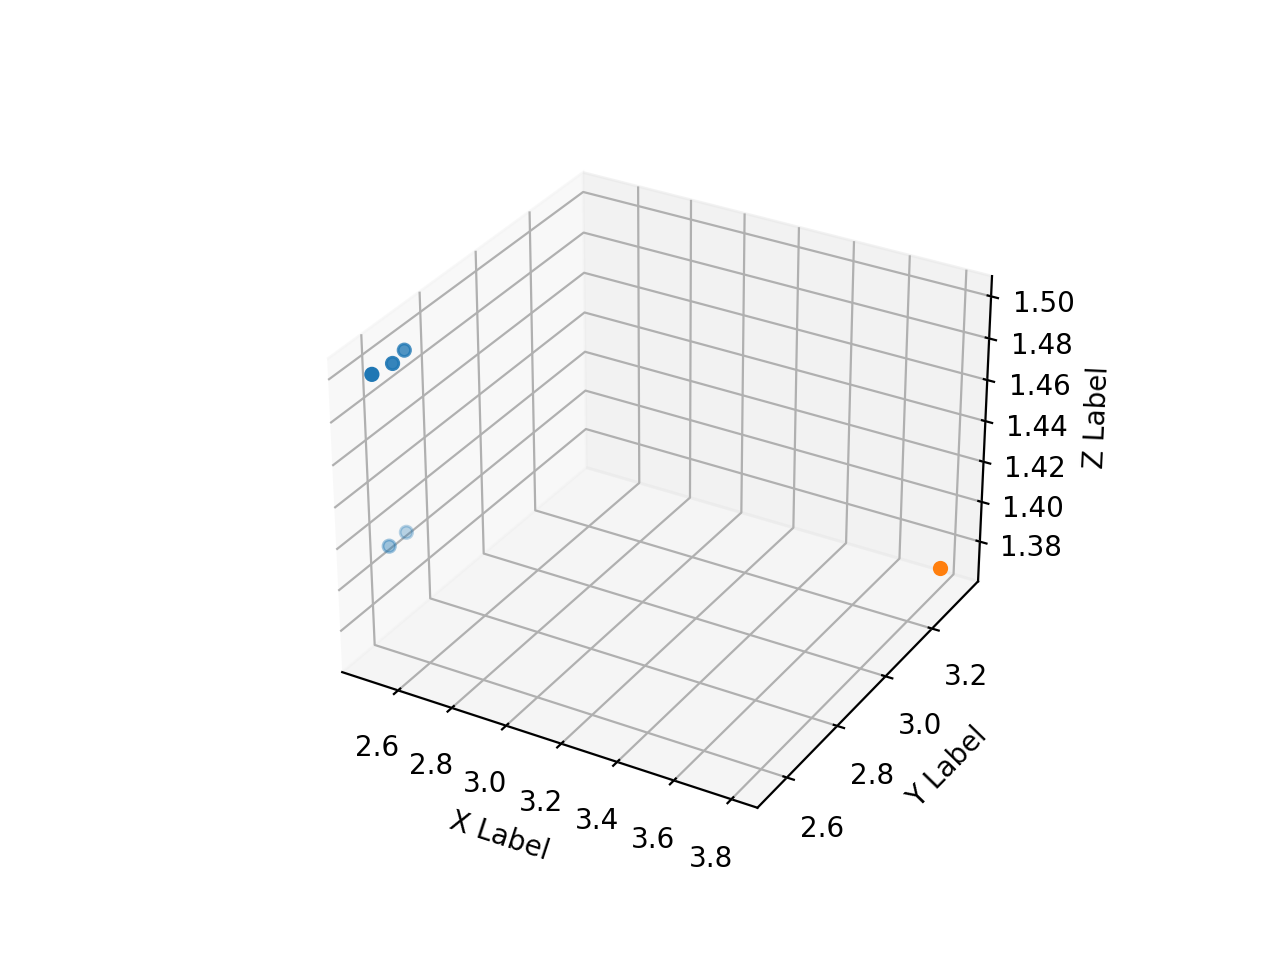

In [55]:
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')

ax.scatter(R[0,:],R[1,:],R[2,:])
ax.scatter(S[0,:],S[1,:],S[2,:])

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.show()

[[3.79409487]
 [3.34714602]
 [1.36926639]]
[[2.484 2.484 2.5   2.484 2.484]
 [2.545 2.655 2.6   2.579 2.639]
 [1.5   1.5   1.5   1.415 1.415]]


<IPython.core.display.Javascript object>


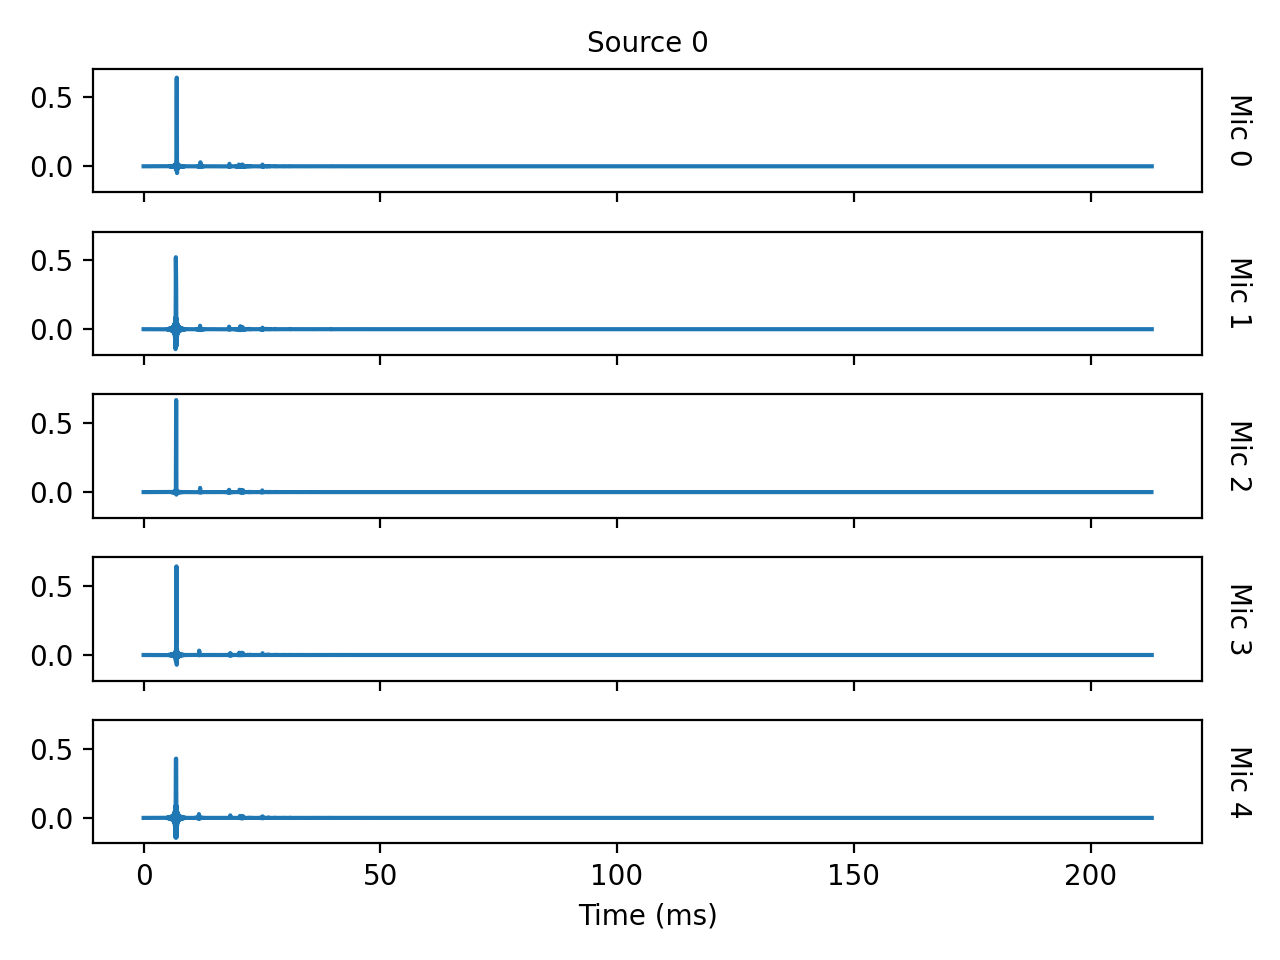

5 1


In [61]:
room_dim = [7,6,4]
fs = 16000
max_order = 10
absorption = 0.9

print(S)
print(R)

room = pra.ShoeBox(room_dim, fs=fs, max_order=max_order, absorption=absorption)
room.add_source(S)
room.add_microphone_array(R)
room.compute_rir()
room.plot_rir()
rirs = room.rir
print(len(rirs), len(rirs[0]))

for i in range(len(rirs)):
    for j in range(len(rirs[i])):
        rir = rirs[i][j]
        assert not np.allclose(rir, np.zeros_like(rir))

<IPython.core.display.Javascript object>


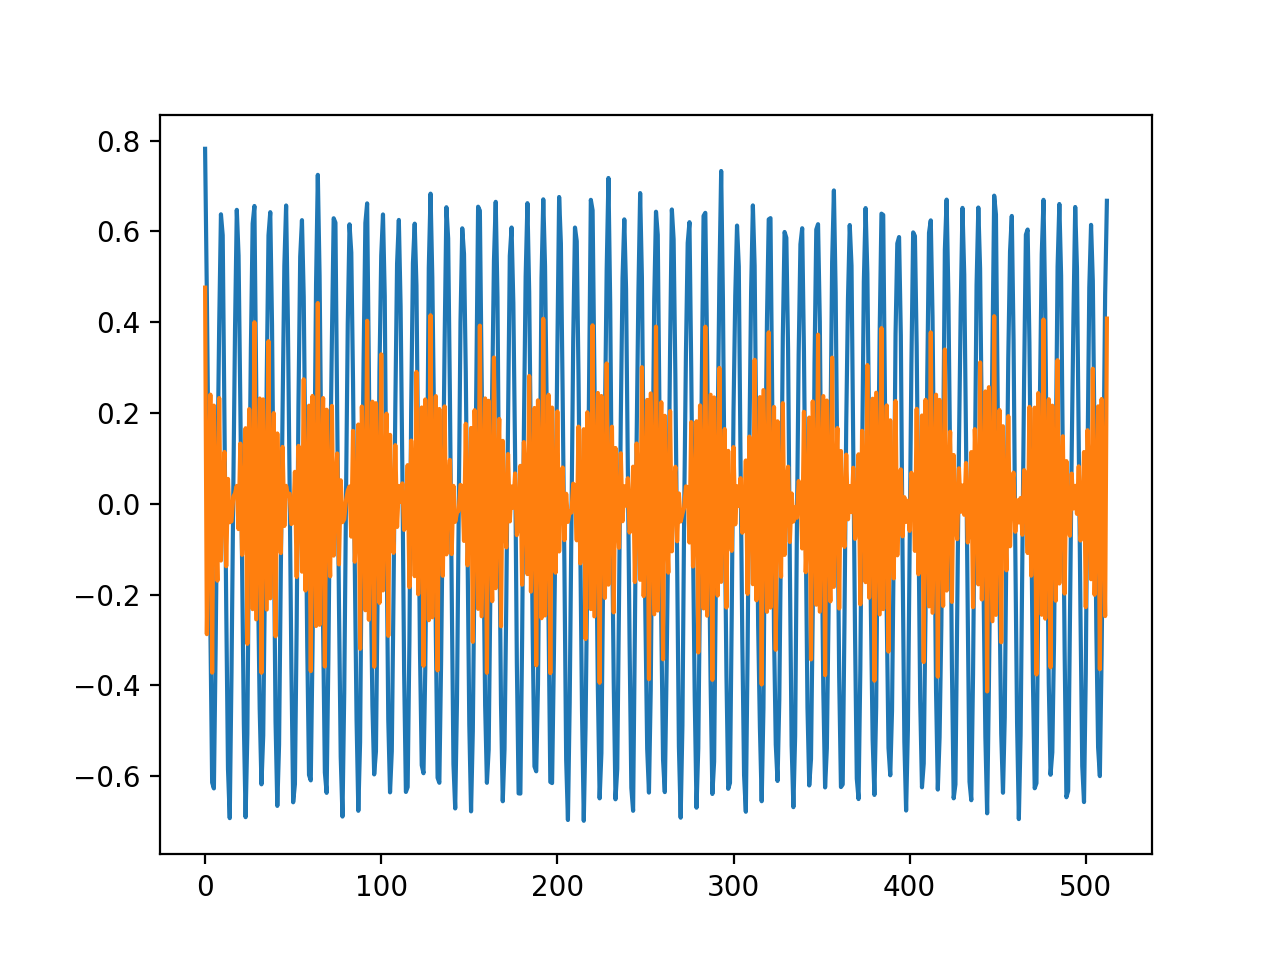

In [68]:
RIR = np.fft.rfft(rirs[0][0], 1024)

plt.figure()
plt.plot(RIR.real)

RIR = librosa.stft(rirs[0][0], n_fft=1024)[:,:3].mean(-1)
plt.plot(RIR.real)